In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, norm
from scipy import stats as st
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.tsatools import lagmat

In [ ]:
pip install shap

In [ ]:
pip install pmdarima

In [ ]:
import shap
import pmdarima as pm

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
custom_palette = ['black', 'orange', 'purple', 'green', 'blue', 'red', 'yellow', 'pink']
sns.set_theme(style = 'whitegrid', palette = custom_palette)

C:\Users\Арсений\Downloads\tab1_zpl_03-2024.xlsx

In [ ]:
df = pd.read_excel('/content/tab1_zpl_03-2024.xlsx')

In [ ]:
df

,year,salary,I,II,III,IV,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
0,1991,0.548,0.313,0.434667,0.567333,0.912333,0.308,0.294,0.337,0.373,0.438,0.493,0.541,0.548,0.613,0.703,0.839,1.195
1,1992,6.000,2.100,4.000000,6.300000,12.100000,1.400,2.000,2.700,3.100,3.700,5.100,5.500,5.900,7.400,8.900,10.600,16.100
2,1993,58.700,19.400,38.500000,67.400000,109.500000,15.300,19.100,23.600,30.600,37.500,47.400,56.000,65.400,80.900,93.000,101.500,141.200
3,1994,220.400,148.100,187.500000,232.300000,298.600000,134.200,144.700,164.800,171.500,183.500,207.500,221.000,232.800,253.200,265.000,281.600,354.200
4,1995,472.400,328.200,432.200000,528.300000,643.200000,302.600,321.000,361.500,386.200,429.900,480.600,499.500,520.600,564.500,594.500,615.700,735.500
5,1996,790.200,695.300,789.700000,838.300000,903.800000,654.800,684.400,745.000,746.500,779.300,837.200,842.800,831.000,848.100,843.300,835.000,1017.100
6,1997,950.200,844.000,941.000000,1001.000000,1074.000000,812.200,821.200,902.900,901.100,919.700,993.200,999.100,982.300,1026.200,1006.100,997.800,1214.800
7,1998,1051.000,1010.000,1069.000000,1094.000000,1255.000000,988.000,1000.000,1059.000,1040.000,1047.000,1122.000,1110.000,1052.000,1112.000,1123.000,1164.000,1482.000
8,1999,1523.000,1248.000,1511.000000,1642.000000,1927.000000,1167.000,1199.000,1385.000,1423.000,1472.000,1626.000,1618.000,1608.000,1684.000,1716.000,1789.000,2283.000
9,2000,2223.000,1899.000,2148.000000,2336.000000,2652.000000,1830.000,1839.000,2018.000,2039.000,2101.000,2294.000,2302.000,2289.000,2367.000,2425.000,2508.000,3025.000


# Разбиение зарплаты на кварталы

In [ ]:
data = []
for i in df.index.tolist():
  for q in df.columns[2:6]:
    year = df.loc[i,'year']
    quar = q
    sal = df.loc[i,q]
    data.append({'year': year, 'quarter': quar, 'salary': sal})
df_quarters = pd.DataFrame(data)

In [ ]:
df_quarters

,year,quarter,salary
0,1991,I,0.313000
1,1991,II,0.434667
2,1991,III,0.567333
3,1991,IV,0.912333
4,1992,I,2.100000
...,...,...,...
131,2023,IV,83684.000000
132,2024,I,80582.000000
133,2024,II,NaN
134,2024,III,NaN


In [ ]:
quarter_map = {
    'I': '01',
    'II': '04',
    'III': '07',
    'IV': '10'
}
df_quarters['quarter_num'] = df_quarters['quarter'].map(quarter_map)
df_quarters['year'] = '01.' + df_quarters['quarter_num'] + '.' + df_quarters['year'].astype(str)
df_quarters['year'] = pd.to_datetime(df_quarters['year'], format = '%d.%m.%Y')
df_quarters = df_quarters.drop(['quarter','quarter_num'], axis = 1)


In [ ]:
df_quarters

,year,salary
0,1991-01-01,0.313000
1,1991-04-01,0.434667
2,1991-07-01,0.567333
3,1991-10-01,0.912333
4,1992-01-01,2.100000
...,...,...
131,2023-10-01,83684.000000
132,2024-01-01,80582.000000
133,2024-04-01,NaN
134,2024-07-01,NaN


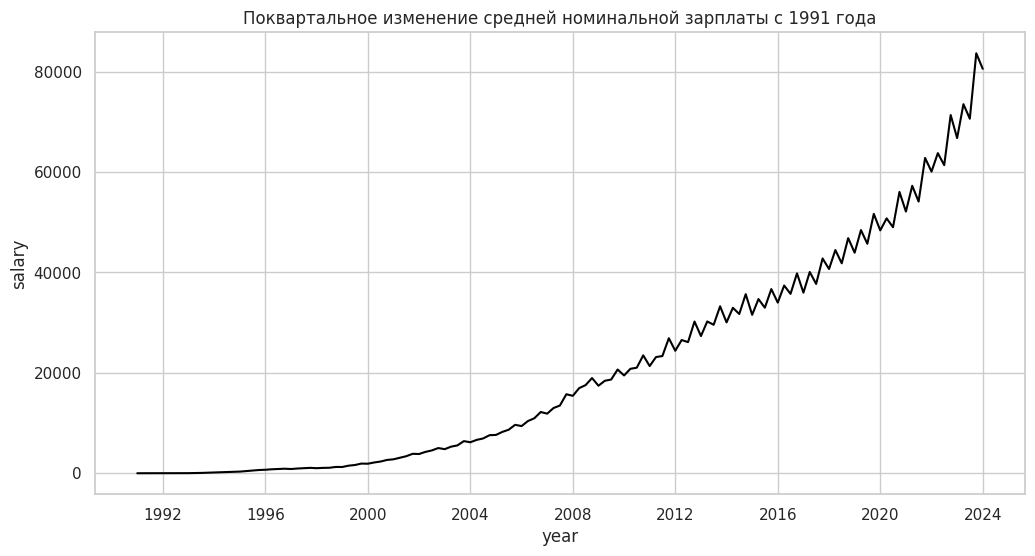

In [ ]:
sns.lineplot(data = df_quarters, x = 'year', y = 'salary').set(title = 'Поквартальное изменение средней номинальной зарплаты с 1991 года')
plt.show()

# Загрузка предикторов и объединение датасетов

In [ ]:
predictors = pd.read_excel('/content/Predictors.xlsx')

In [ ]:
predictors

,quarter,gdp def ву 4 q 1994,Basic IPC by 4 q 1994
0,1995-01-01,168.539465,1.498979
1,1995-04-01,182.173545,1.913676
2,1995-07-01,200.761953,2.254930
3,1995-10-01,187.639103,2.568331
4,1996-01-01,160.536054,2.848277
...,...,...,...
111,2022-10-01,567.618657,74.931134
112,2023-01-01,473.674760,76.373081
113,2023-04-01,518.883853,77.223797
114,2023-07-01,575.433193,78.354337


In [ ]:
predictors.columns = ['quarter', 'gdp', 'ipc']

In [ ]:
predictors

,quarter,gdp,ipc
0,1995-01-01,168.539465,1.498979
1,1995-04-01,182.173545,1.913676
2,1995-07-01,200.761953,2.254930
3,1995-10-01,187.639103,2.568331
4,1996-01-01,160.536054,2.848277
...,...,...,...
111,2022-10-01,567.618657,74.931134
112,2023-01-01,473.674760,76.373081
113,2023-04-01,518.883853,77.223797
114,2023-07-01,575.433193,78.354337


In [ ]:
data = predictors.merge(df_quarters, left_on = 'quarter', right_on = 'year', how = 'inner')
data = data.drop('year', axis = 1)

In [ ]:
data

,quarter,gdp,ipc,salary
0,1995-01-01,168.539465,1.498979,328.2
1,1995-04-01,182.173545,1.913676,432.2
2,1995-07-01,200.761953,2.254930,528.3
3,1995-10-01,187.639103,2.568331,643.2
4,1996-01-01,160.536054,2.848277,695.3
...,...,...,...,...
111,2022-10-01,567.618657,74.931134,71377.0
112,2023-01-01,473.674760,76.373081,66778.0
113,2023-04-01,518.883853,77.223797,73534.0
114,2023-07-01,575.433193,78.354337,70638.5


# Предобработка данных

In [ ]:
data.columns = ['quarter', 'gdp_def_1995', 'Basic_IPC_dec_1994', 'salary']

<Axes: >

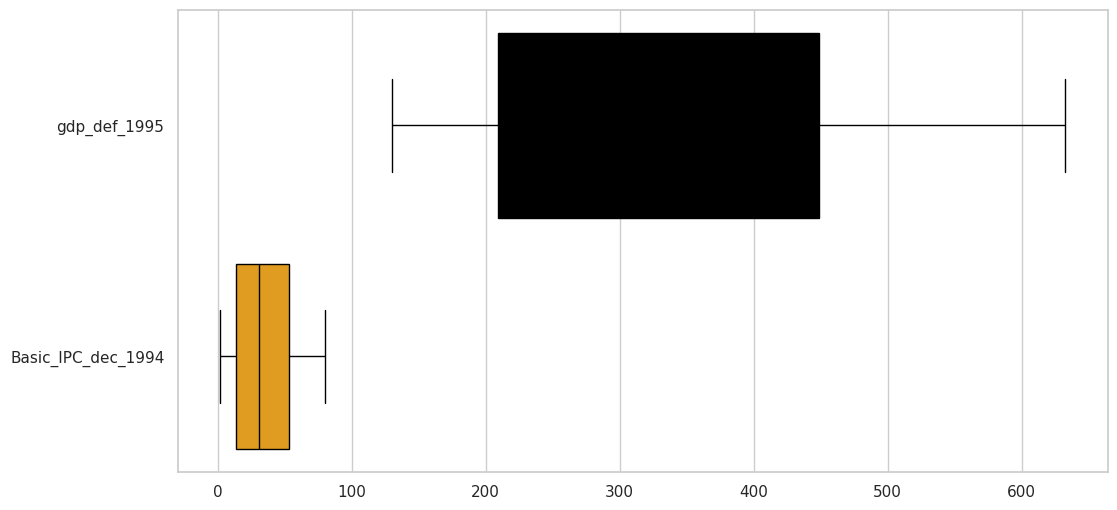

In [ ]:
sns.boxplot(data[['gdp_def_1995', 'Basic_IPC_dec_1994']], orient = 'h')

<Axes: >

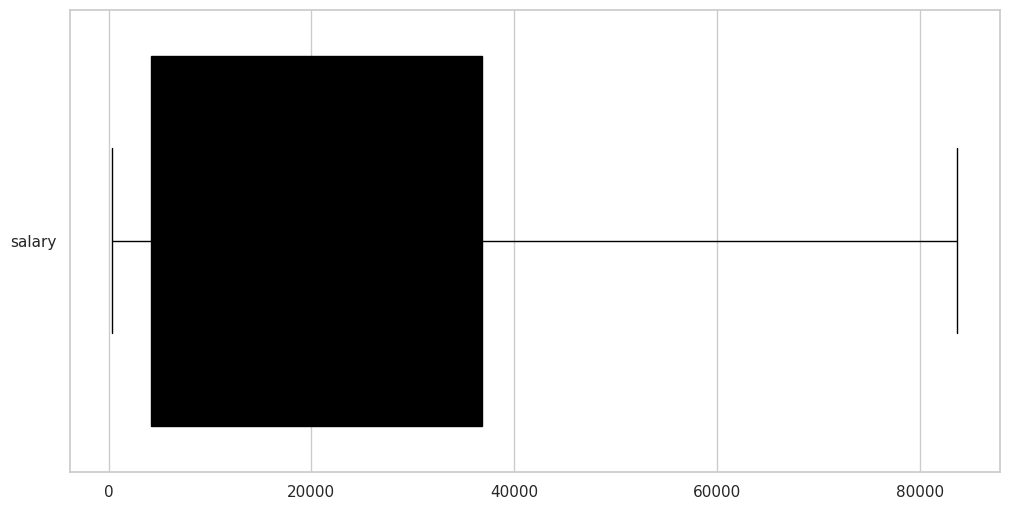

In [ ]:
sns.boxplot(data[['salary']], orient = 'h')

Выбросов нет

In [ ]:
data.isna().sum()

quarter               0
gdp_def_1995          0
Basic_IPC_dec_1994    0
salary                0
dtype: int64

Пропусков нет

In [ ]:
data.duplicated().sum()

0

Дубликатов тоже нет

Создадим датасет для работы

In [ ]:
sal = data.copy()
sal['quarter'] = np.arange(1,len(data)+1).tolist()
sal.columns = ['quarter', 'gdp', 'ipc', 'salary']

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quarter             116 non-null    int64  
 1   gdp_def_1995        116 non-null    float64
 2   Basic_IPC_dec_1994  116 non-null    float64
 3   salary              116 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.8 KB


In [ ]:
# Выбор предикторов и целевой переменной
X = sal.drop(columns = 'salary')
y = sal['salary']

In [ ]:
# Разделение на тестовую и обучающие выборки
X_train, X_test, y_train, y_test = X[:round(len(data)*0.75)], X[round(len(data)*0.75):],y[:round(len(data)*0.75)], y[round(len(data)*0.75):]

In [ ]:
# Стандартизация данных
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# Модель линейной регрессии

In [ ]:
# Построим модель линейной регрессии
linear = LinearRegression()
results = linear.fit(X_train_st, y_train)
predict = results.predict(X_test_st)
predictions_train = results.predict(X_train_st)

Тесты на автокорреляцию и нормальность

В модели присутствует автокорреляция остатков


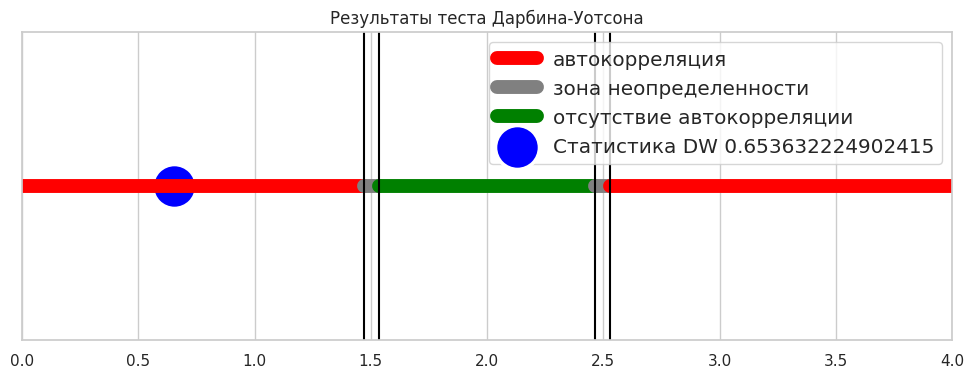

In [ ]:
#Считаем остатки
residuals = predictions_train - y_train

#Тест Дарбина Уотсона
dw = durbin_watson(residuals)
# Критические значения
dl=1.47
du = 1.537

# Проверка наличия автокорреляции
if (dw < du) or dw > 4-du:
  print('В модели присутствует автокорреляция остатков')
else:
  print('Автокорреляция остатков отсутствует')

# Построение графика
#Рисуем зоны
plt.figure(figsize = (12,4))
plt.plot([0, dl], [1, 1], color='red', lw=10, label='автокорреляция')
plt.plot([dl,du], [1,1], color = 'gray', lw =10, label = 'зона неопределенности')
plt.plot([du, 4- du], [1,1], color = 'green', lw =10, label = 'отсутствие автокорреляции')
plt.plot([4-du,4-dl], [1,1], color = 'gray', lw =10)
plt.plot([4-dl, 4], [1,1], color='red', lw=10)
#Ограничительные линии
plt.axvline(x = dl, c = 'black')
plt.axvline(x = 4-dl, c = 'black')
plt.axvline(x = du, c = 'black')
plt.axvline(x = 4-du, c = 'black')
sns.scatterplot(x = [dw], y = [1], color = 'blue', s = 1000, label = f'Статистика DW {dw}')
plt.legend( fontsize='large')
plt.title('Результаты теста Дарбина-Уотсона')
plt.xlim(0,4)
plt.gca().yaxis.set_visible(False)
plt.show()

Нормальность остатков

P-value теста на нормальность: 0.0033099076244980097
Гипотеза о нормальности распределения остатков отклоняется


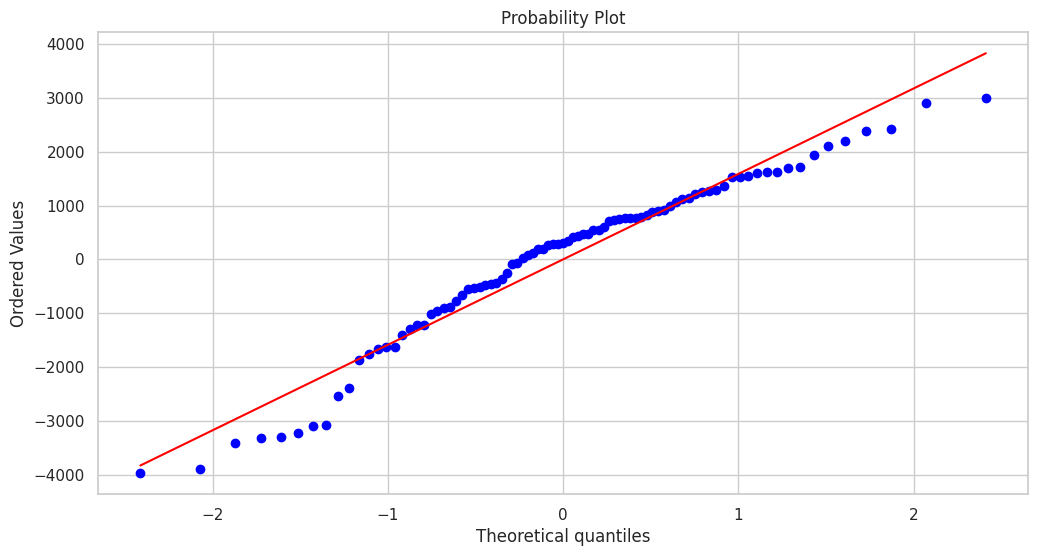

In [ ]:
shapiro_test = shapiro(residuals)
print(f'P-value теста на нормальность: {shapiro_test.pvalue}')
if shapiro_test.pvalue < 0.05:
  print('Гипотеза о нормальности распределения остатков отклоняется')
else:
  print('Нет оснований отклонить гипотезу о нормальности распределения остатков')
st.probplot(residuals, dist = 'norm', plot = plt)
plt.show()

Метрики обучающей выборки

In [ ]:
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя относительная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 1586.9208648918643
Средняя относительная ошибка  (MAPE): 0.40969803746679245
Коэффициент детерминации (R^2): 0.9822311911987256


Метрики тестовой выборки

In [ ]:
rmse = mean_squared_error(y_test,predict, squared=False)
mape = mean_absolute_percentage_error(y_test,predict)
r2 = r2_score(y_test,predict)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя относительная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 7412.762446057057
Средняя относительная ошибка  (MAPE): 0.11177406042522871
Коэффициент детерминации (R^2): 0.6129607647783502


In [ ]:
#Построим график фактических и прогнозных значений
dat  = data[['quarter', 'salary']]
dat['predictions_train'] = np.nan
dat['predictions_test'] = np.nan
dat.loc[:86, 'predictions_train'] = predictions_train
dat.loc[87:,'predictions_test'] = predict

<ipython-input-32-cba920754cc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['predictions_train'] = np.nan


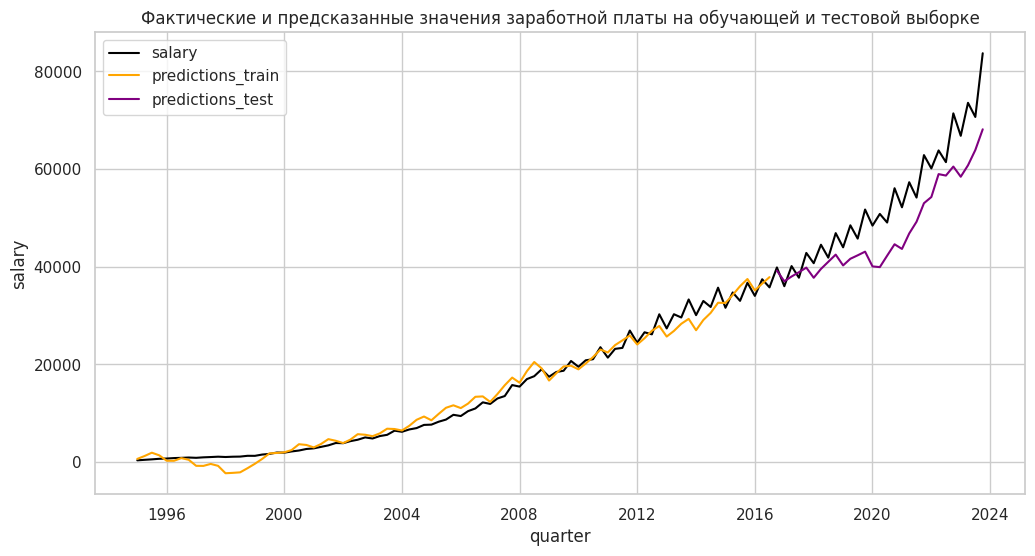

In [ ]:
for col in dat.columns[1:]:
  sns.lineplot(data = dat, x = 'quarter', y = col, label = col)
plt.legend()
plt.title('Фактические и предсказанные значения заработной платы на обучающей и тестовой выборке')
plt.show()

Проверим влияние предикторов с помощью значений Шепли

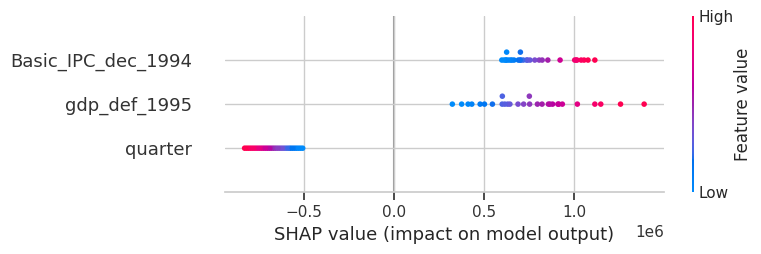

In [ ]:
explainer = shap.Explainer(results, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

# Полиномиальная модель

In [ ]:
# Инициируем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Разделение на тестовую и обучающую выборки и стандартизируем
X_train, X_test, y_train, y_test = X_poly[:round(len(data)*0.75)], X_poly[round(len(data)*0.75):],y[:round(len(data)*0.75)], y[round(len(data)*0.75):]
X_train_st = scaler.fit_transform(X_train)
# Обучаем модель и строим прогнозы
model = LinearRegression()
reg = model.fit(X_train_st, y_train)
X_test_st = scaler.transform(X_test)
predictions_test = model.predict(X_test_st)
predictions_train = model.predict(X_train_st)

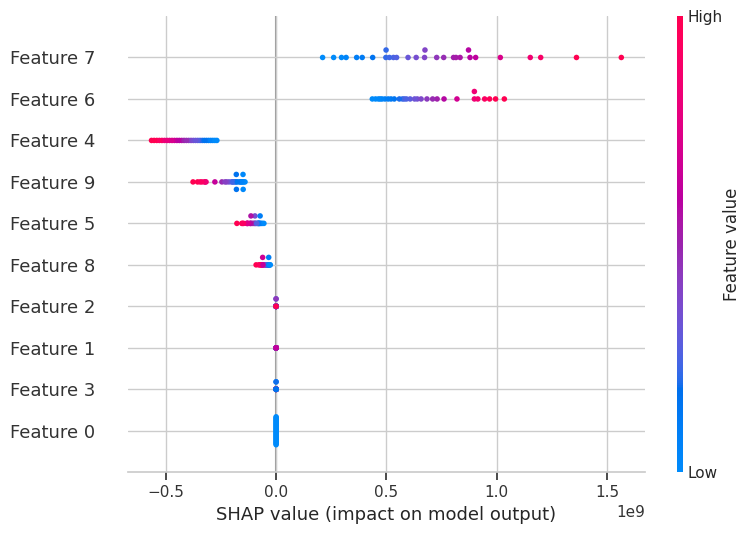

In [ ]:
explainer = shap.Explainer(reg, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

Отбираем наиболее влиятельные признаки и еще раз строим модель

In [ ]:
# Инициируем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Даем названия полиномиальным признакам
feature_names = poly.get_feature_names_out(X.columns)
# Отбираем самые важные признаки
indices_to_keep = [7,6]
X_poly = X_poly[:,indices_to_keep]
# Отбираем нужные имена признаков
selected_feature_names = [feature_names[i] for i in indices_to_keep]
# Разделение на тестовую и обучающую выборки и стандартизируем
X_train, X_test, y_train, y_test = X_poly[:round(len(data)*0.75)], X_poly[round(len(data)*0.75):],y[:round(len(data)*0.75)], y[round(len(data)*0.75):]
X_train_st = scaler.fit_transform(X_train)
# Обучаем модель и строим прогнозы
model = LinearRegression()
reg = model.fit(X_train_st, y_train)
X_test_st = scaler.transform(X_test)
predictions_test = model.predict(X_test_st)
predictions_train = model.predict(X_train_st)

In [ ]:
coefficients = reg.coef_
intercept = reg.intercept_
# Обратная трансформация коэффициентов
original_std = scaler.scale_
original_mean = scaler.mean_
# Преобразование коэффициентов
original_coefficients = coefficients / original_std
# Преобразование свободного члена
original_intercept = intercept - np.sum(original_mean * original_coefficients)
# Вывод оригинальных коэффициентов и своболного члена
print("Коэффициенты модели:", original_coefficients)
print("Своболный член модели:", original_intercept)
#print(f'Y = original_intercept + {original_coefficients[0]} * {selected_feature_names[0]} +{original_coefficients[1]} * {selected_feature_names[1]} + {original_coefficients[2]} * {selected_feature_names[2]} ')

Коэффициенты модели: [0.04916054 6.63509177]
Своболный член модели: -755.6873988252773


В модели присутствует автокорреляция остатков


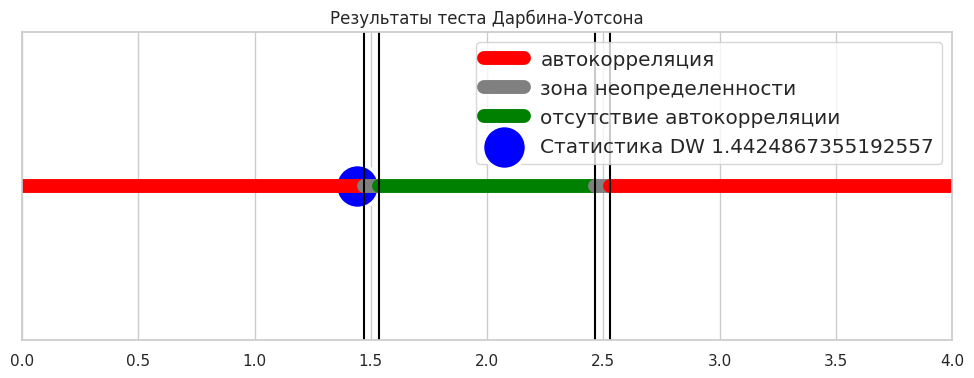

In [ ]:
#Считаем остатки
residuals = predictions_train - y_train

#Тест Дарбина Уотсона
dw = durbin_watson(residuals)
# Критические значения
dl=1.47
du = 1.537

# Проверка наличия автокорреляции
if (dw < du) or dw > 4-du:
  print('В модели присутствует автокорреляция остатков')
else:
  print('Автокорреляция остатков отсутствует')

# Построение графика
#Рисуем зоны
plt.figure(figsize = (12,4))
plt.plot([0, dl], [1, 1], color='red', lw=10, label='автокорреляция')
plt.plot([dl,du], [1,1], color = 'gray', lw =10, label = 'зона неопределенности')
plt.plot([du, 4- du], [1,1], color = 'green', lw =10, label = 'отсутствие автокорреляции')
plt.plot([4-du,4-dl], [1,1], color = 'gray', lw =10)
plt.plot([4-dl, 4], [1,1], color='red', lw=10)
#Ограничительные линии
plt.axvline(x = dl, c = 'black')
plt.axvline(x = 4-dl, c = 'black')
plt.axvline(x = du, c = 'black')
plt.axvline(x = 4-du, c = 'black')
sns.scatterplot(x = [dw], y = [1], color = 'blue', s = 1000, label = f'Статистика DW {dw}')
plt.legend( fontsize='large')
plt.title('Результаты теста Дарбина-Уотсона')
plt.xlim(0,4)
plt.gca().yaxis.set_visible(False)
plt.show()

P-value теста на нормальность: 0.010124364867806435
Гипотеза о нормальности распределения остатков отклоняется


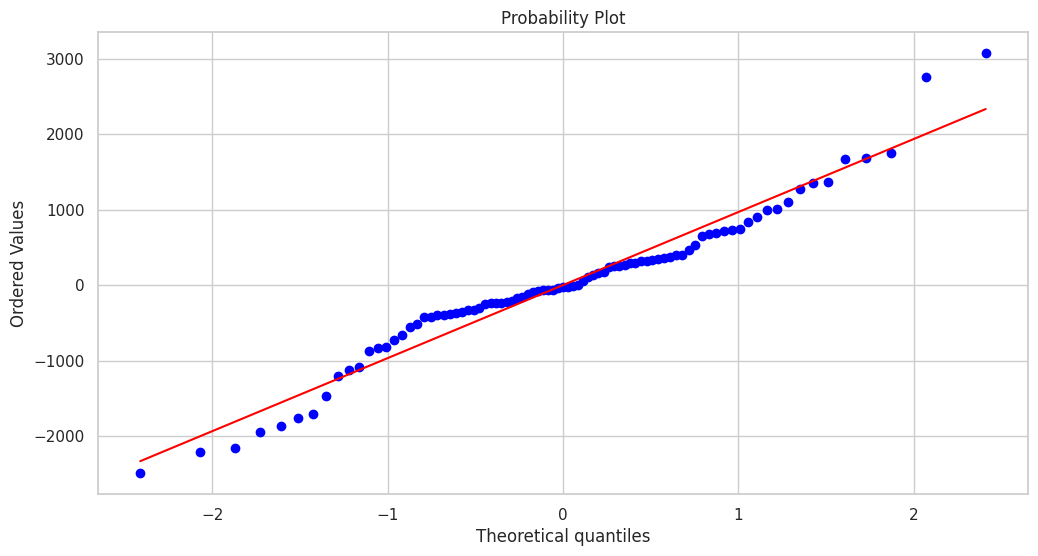

In [ ]:
shapiro_test = shapiro(residuals)
print(f'P-value теста на нормальность: {shapiro_test.pvalue}')
if shapiro_test.pvalue < 0.05:
  print('Гипотеза о нормальности распределения остатков отклоняется')
else:
  print('Нет оснований отклонить гипотезу о нормальности распределения остатков')
st.probplot(residuals, dist = 'norm', plot = plt)
plt.show()

In [ ]:
mse = mean_squared_error(y_train,predictions_train)
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mae = mean_absolute_error(y_train,predictions_train)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 936392.9978425659
Среднеквадратическая ошибка (RMSE): 967.6740142437255
Средняя абсолютная ошибка (MAE): 690.9990289020477
Средняя абсолютная ошибка  (MAPE): 0.12333443765124312
Коэффициент детерминации (R^2): 0.9933929752893524


In [ ]:
mse = mean_squared_error(y_test,predictions_test)
rmse = mean_squared_error(y_test,predictions_test, squared=False)
mae = mean_absolute_error(y_test,predictions_test)
mape = mean_absolute_percentage_error(y_test,predictions_test)
r2 = r2_score(y_test,predictions_test)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 7247928.172922176
Среднеквадратическая ошибка (RMSE): 2692.19764744756
Средняя абсолютная ошибка (MAE): 2135.7318774290266
Средняя абсолютная ошибка  (MAPE): 0.040774525214636495
Коэффициент детерминации (R^2): 0.9489484763435537


In [ ]:
#Построим график фактических и прогнозных значений
dat  = data[['quarter', 'salary']]
dat['predictions_train'] = np.nan
dat['predictions_test'] = np.nan
dat.loc[:86, 'predictions_train'] = predictions_train
dat.loc[87:,'predictions_test'] = predictions_test

<ipython-input-219-6469b9e0b267>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['predictions_train'] = np.nan


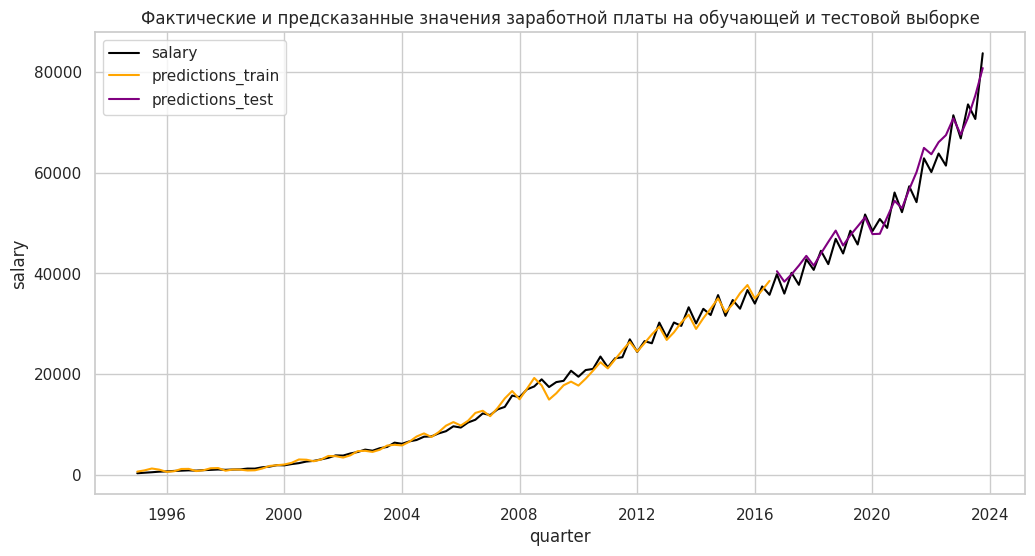

In [ ]:
for col in dat.columns[1:]:
  sns.lineplot(data = dat, x = 'quarter', y = col, label = col)
plt.legend()
plt.title('Фактические и предсказанные значения заработной платы на обучающей и тестовой выборке')
plt.show()

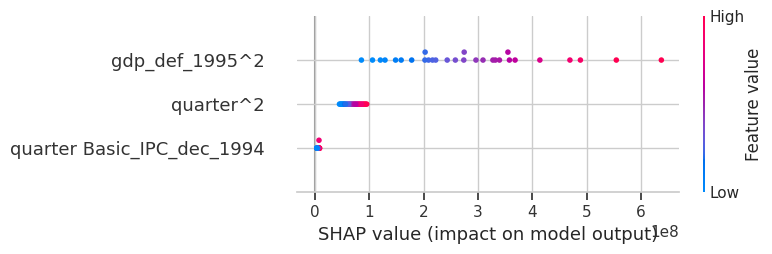

In [ ]:
explainer = shap.Explainer(reg, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names = selected_feature_names)

# Использование модели Auto-ARIMA(SARIMA)

In [ ]:
sal2 = pd.DataFrame()
sal2['quarter^2'] = sal['quarter']**2
sal2['gdp^2'] = sal['gdp']**2
sal2['quarter*inf'] = sal['quarter']* sal['ipc']

In [ ]:
# Выбор предикторов и целевой переменной
X = sal2
y = sal['salary']
# Разделение на тестовую и обучающие выборки
X_train, X_test, y_train, y_test = X[:round(len(data)*0.75)], X[round(len(data)*0.75):],y[:round(len(data)*0.75)], y[round(len(data)*0.75):]
# Стандартизация данных
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [ ]:
# Обучение модели и предсказание значений
sar = pm.auto_arima(y_train, exogenous=X_train_st, seasonal=False,
                      error_action='ignore', suppress_warnings=True)
predictions = sar.predict(n_periods = len(y_test), exogenous =  X_test_st)

Автокорреляция остатков отсутствует


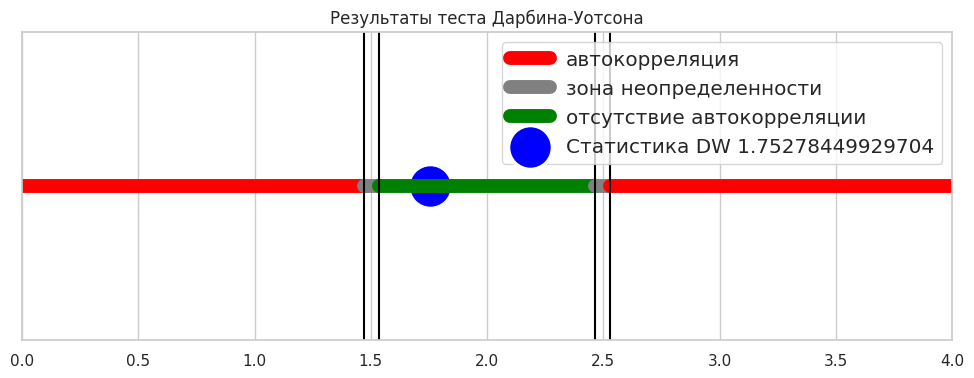

In [ ]:
#Тест Дарбина Уотсона
dw = durbin_watson(sar.resid())
# Критические значения
dl=1.47
du = 1.537

# Проверка наличия автокорреляции
if (dw < du) or dw > 4-du:
  print('В модели присутствует автокорреляция остатков')
else:
  print('Автокорреляция остатков отсутствует')

# Построение графика
#Рисуем зоны
plt.figure(figsize = (12,4))
plt.plot([0, dl], [1, 1], color='red', lw=10, label='автокорреляция')
plt.plot([dl,du], [1,1], color = 'gray', lw =10, label = 'зона неопределенности')
plt.plot([du, 4- du], [1,1], color = 'green', lw =10, label = 'отсутствие автокорреляции')
plt.plot([4-du,4-dl], [1,1], color = 'gray', lw =10)
plt.plot([4-dl, 4], [1,1], color='red', lw=10)
#Ограничительные линии
plt.axvline(x = dl, c = 'black')
plt.axvline(x = 4-dl, c = 'black')
plt.axvline(x = du, c = 'black')
plt.axvline(x = 4-du, c = 'black')
sns.scatterplot(x = [dw], y = [1], color = 'blue', s = 1000, label = f'Статистика DW {dw}')
plt.legend( fontsize='large')
plt.title('Результаты теста Дарбина-Уотсона')
plt.xlim(0,4)
plt.gca().yaxis.set_visible(False)
plt.show()

P-value теста на нормальность: 2.1400246623670682e-06
Гипотеза о нормальности распределения остатков отклоняется


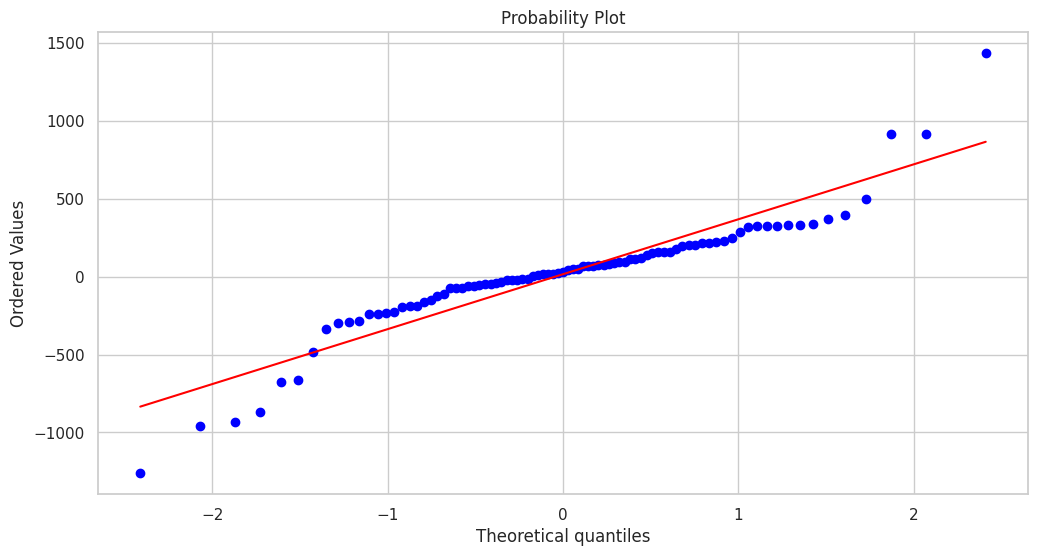

In [ ]:
shapiro_test = shapiro(sar.resid())
print(f'P-value теста на нормальность: {shapiro_test.pvalue}')
if shapiro_test.pvalue < 0.05:
  print('Гипотеза о нормальности распределения остатков отклоняется')
else:
  print('Нет оснований отклонить гипотезу о нормальности распределения остатков')
st.probplot(sar.resid(), dist = 'norm', plot = plt)
plt.show()

In [ ]:
model_predictions = sar.predict_in_sample()
#Оценка обучающей выборки
rmse = mean_squared_error(y_train,model_predictions, squared=False)
mape = mean_absolute_percentage_error(y_train,model_predictions)
r2 = r2_score(y_train,model_predictions)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 368.5227948730031
Средняя абсолютная ошибка  (MAPE): 0.047212129327684704
Коэффициент детерминации (R^2): 0.9990417551673283


In [ ]:
rmse = mean_squared_error(y_test,predictions, squared=False)
mape = mean_absolute_percentage_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 7529.179569050856
Средняя абсолютная ошибка  (MAPE): 0.07991655150896908
Коэффициент детерминации (R^2): 0.6007084333338534


In [ ]:
#Построим график фактических и прогнозных значений
dat  = data[['quarter', 'salary']]
dat['predictions_train'] = np.nan
dat['predictions_test'] = np.nan
dat.loc[:86, 'predictions_train'] = model_predictions
dat.loc[87:,'predictions_test'] = predictions

<ipython-input-88-a4a59a8b0486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['predictions_train'] = np.nan


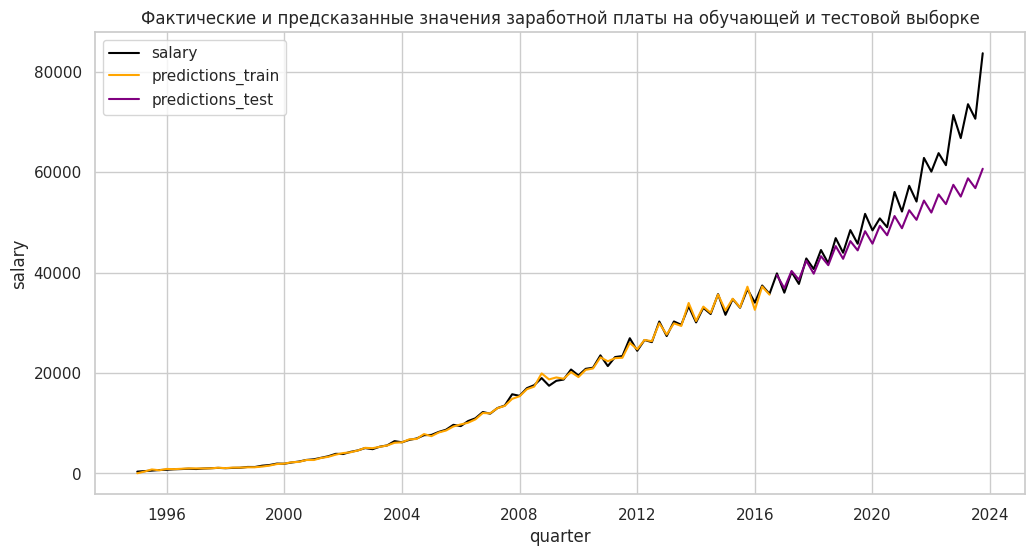

In [ ]:
for col in dat.columns[1:]:
  sns.lineplot(data = dat, x = 'quarter', y = col, label = col)
plt.legend()
plt.title('Фактические и предсказанные значения заработной платы на обучающей и тестовой выборке')
plt.show()

In [ ]:
model = pm.auto_arima(y_train, exogenous=X_train, seasonal=True,
                      error_action='ignore', suppress_warnings=True)
predictions = model.predict(n_periods = len(y_test), exogenous =  X_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
model_predictions = model.predict_in_sample()
#Оценка обучающей выборки
mse = mean_squared_error(y_train,model_predictions)
rmse = mean_squared_error(y_train,model_predictions, squared=False)
mae = mean_absolute_error(y_train,model_predictions)
mape = mean_absolute_percentage_error(y_train,model_predictions)
r2 = r2_score(y_train,model_predictions)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 280933.9239429154
Среднеквадратическая ошибка (RMSE): 530.0320027535275
Средняя абсолютная ошибка (MAE): 363.87270890952925
Средняя абсолютная ошибка  (MAPE): 0.05839471418740686
Коэффициент детерминации (R^2): 0.9980073276186137


In [ ]:
mse = mean_squared_error(y_test,predictions)
rmse = mean_squared_error(y_test,predictions, squared=False)
mae = mean_absolute_error(y_test,predictions)
mape = mean_absolute_percentage_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 129104882.83447158
Среднеквадратическая ошибка (RMSE): 11362.432962815295
Средняя абсолютная ошибка (MAE): 8915.533714225949
Средняя абсолютная ошибка  (MAPE): 0.14605679756948703
Коэффициент детерминации (R^2): 0.03414175585018342


In [ ]:
#Построим график фактических и прогнозных значений
dat  = data[['quarter', 'salary']]
dat['predictions_train'] = np.nan
dat['predictions_test'] = np.nan
dat.loc[:86, 'predictions_train'] = model_predictions
dat.loc[87:,'predictions_test'] = predictions

<ipython-input-263-a4a59a8b0486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['predictions_train'] = np.nan


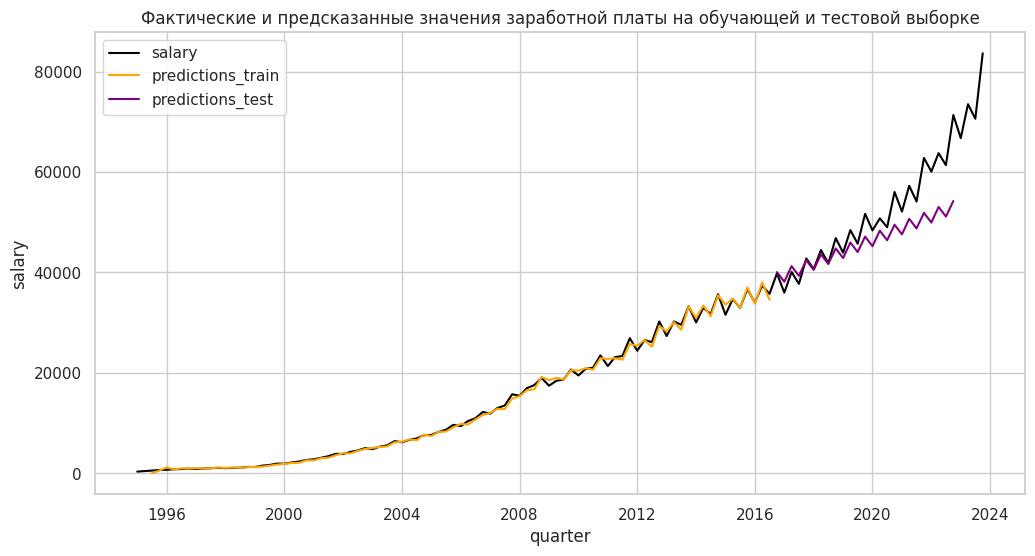

In [ ]:
for col in dat.columns[1:]:
  sns.lineplot(data = dat, x = 'quarter', y = col, label = col)
plt.legend()
plt.title('Фактические и предсказанные значения заработной платы на обучающей и тестовой выборке')
plt.show()

# Модель DESISION TREE

In [ ]:
# Выбор предикторов и целевой переменной
X = sal.drop(columns = 'salary')
y = sal['salary']

# Разделение на тестовую и обучающие выборки
X_train, X_test, y_train, y_test = X[:round(len(data)*0.75)], X[round(len(data)*0.75):],y[:round(len(data)*0.75)], y[round(len(data)*0.75):]

Поиск оптимальных параметров для дерева решений

In [ ]:
param_grid = {
    'max_depth': np.arange(1,10),
    'min_samples_split': np.arange(3,20),
    'min_samples_leaf': np.arange(3,20)
}
# Создание объекта GridSearchCV
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=tscv, scoring='neg_mean_squared_error')

# Поиск оптимальных параметров
grid_search.fit(X_train, y_train)

# Вывод результатов
print("Наилучшие параметры:", grid_search.best_params_)
print("Лучшая оценка среднеквадратической ошибки:", -grid_search.best_score_)

Наилучшие параметры: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}
Лучшая оценка среднеквадратической ошибки: 26792428.79682539


In [ ]:
# Построение модели и рассчет предсказаний
model = DecisionTreeRegressor(max_depth=4, min_samples_split=6, min_samples_leaf=4, random_state=42)
results = model.fit(X_train, y_train)
predictions_test = results.predict(X_test)
predictions_train = results.predict(X_train)

In [ ]:
#Тестовая выборка
rmse = mean_squared_error(y_test,predictions_test, squared=False)
mape = mean_absolute_percentage_error(y_test,predictions_test)
r2 = r2_score(y_test,predictions_test)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя относительная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 20933.743036682718
Средняя относительная ошибка  (MAPE): 0.2912668762778341
Коэффициент детерминации (R^2): -2.086658658737433


В модели присутствует автокорреляция остатков


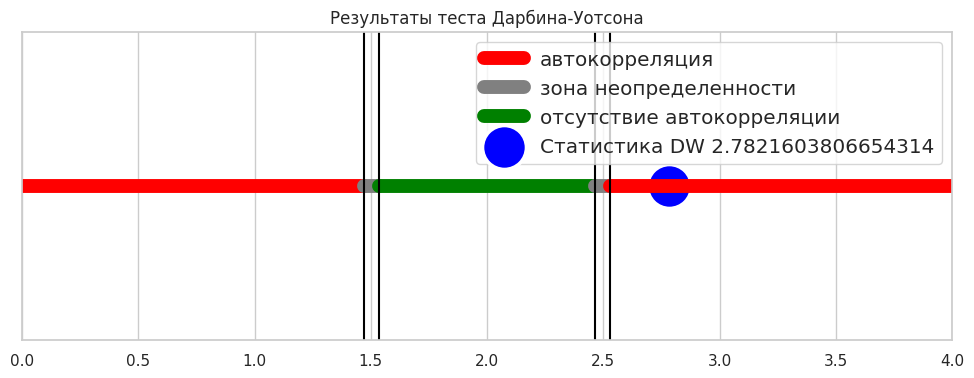

In [ ]:
#Считаем остатки
residuals = predictions_train - y_train

#Тест Дарбина Уотсона
dw = durbin_watson(residuals)
# Критические значения
dl=1.47
du = 1.537

# Проверка наличия автокорреляции
if (dw < du) or dw > 4-du:
  print('В модели присутствует автокорреляция остатков')
else:
  print('Автокорреляция остатков отсутствует')

# Построение графика
#Рисуем зоны
plt.figure(figsize = (12,4))
plt.plot([0, dl], [1, 1], color='red', lw=10, label='автокорреляция')
plt.plot([dl,du], [1,1], color = 'gray', lw =10, label = 'зона неопределенности')
plt.plot([du, 4- du], [1,1], color = 'green', lw =10, label = 'отсутствие автокорреляции')
plt.plot([4-du,4-dl], [1,1], color = 'gray', lw =10)
plt.plot([4-dl, 4], [1,1], color='red', lw=10)
#Ограничительные линии
plt.axvline(x = dl, c = 'black')
plt.axvline(x = 4-dl, c = 'black')
plt.axvline(x = du, c = 'black')
plt.axvline(x = 4-du, c = 'black')
sns.scatterplot(x = [dw], y = [1], color = 'blue', s = 1000, label = f'Статистика DW {dw}')
plt.legend( fontsize='large')
plt.title('Результаты теста Дарбина-Уотсона')
plt.xlim(0,4)
plt.gca().yaxis.set_visible(False)
plt.show()

P-value теста на нормальность: 0.003997803200036287
Гипотеза о нормальности распределения остатков отклоняется


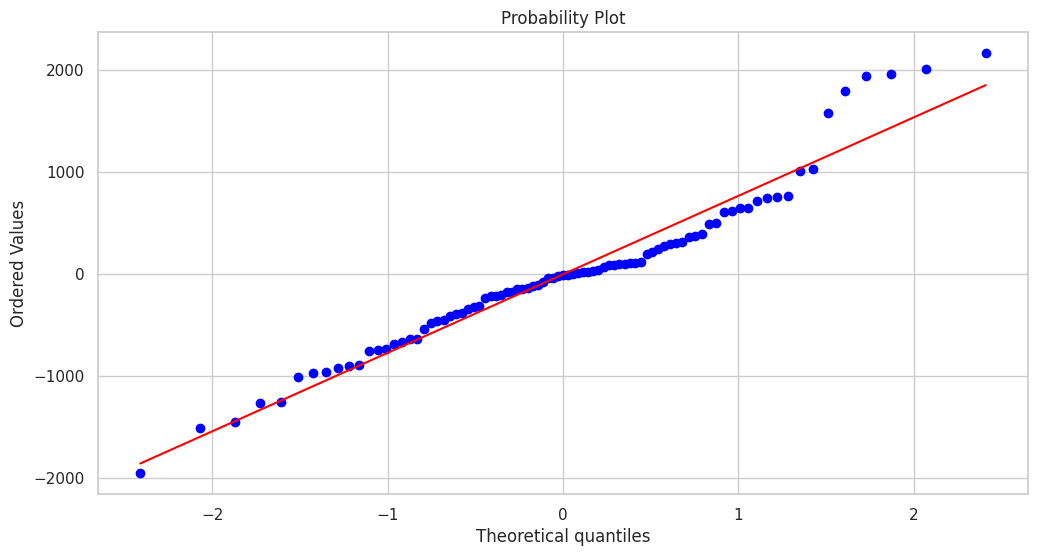

In [ ]:
# Тест на нормальность остатков
shapiro_test = shapiro(residuals)
print(f'P-value теста на нормальность: {shapiro_test.pvalue}')
if shapiro_test.pvalue < 0.05:
  print('Гипотеза о нормальности распределения остатков отклоняется')
else:
  print('Нет оснований отклонить гипотезу о нормальности распределения остатков')
st.probplot(residuals, dist = 'norm', plot = plt)
plt.show()

In [ ]:
# Обучающая выборка
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя относительная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 770.5573810885742
Средняя относительная ошибка  (MAPE): 0.07395110376620102
Коэффициент детерминации (R^2): 0.99581054294108


In [ ]:
#Построим график фактических и прогнозных значений
dat  = data[['quarter', 'salary']]
dat['predictions_train'] = np.nan
dat['predictions_test'] = np.nan
dat.loc[:86, 'predictions_train'] = predictions_train
dat.loc[87:,'predictions_test'] = predictions_test

<ipython-input-38-6469b9e0b267>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['predictions_train'] = np.nan


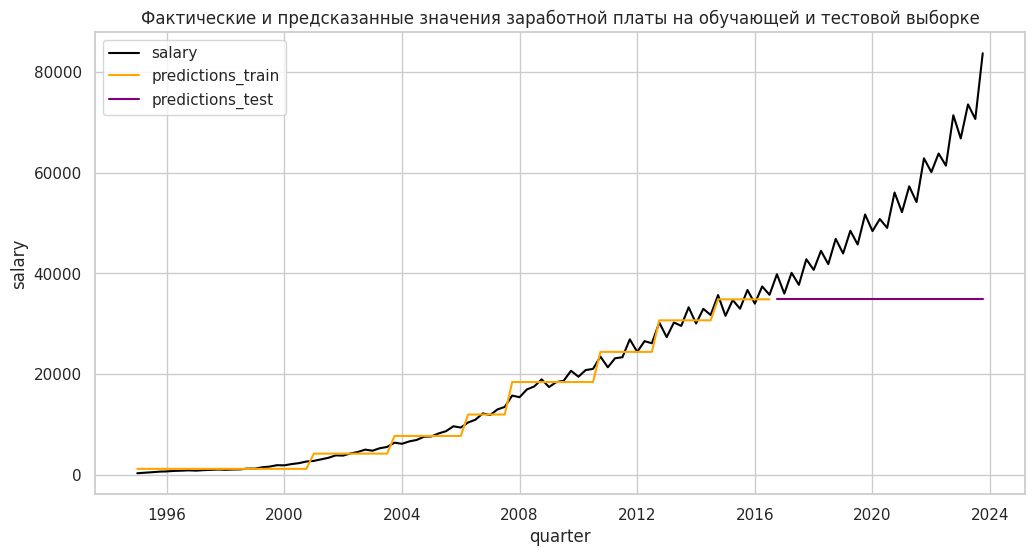

In [ ]:
for col in dat.columns[1:]:
  sns.lineplot(data = dat, x = 'quarter', y = col, label = col)
plt.legend()
plt.title('Фактические и предсказанные значения заработной платы на обучающей и тестовой выборке')
plt.show()

# Probhet

In [ ]:
sal3 = sal2.copy()

In [ ]:
sal3['y'] = sal['salary']
sal3 = sal3.drop('salary', axis = 1)

In [ ]:
sal3['ds'] = pd.date_range(start='1995-01-01', periods=116, freq='Q')

In [ ]:
dftrain = sal3[:87]
dftest = sal3[87:].reset_index(drop = True)
# Подготовка данных
m = Prophet()
m.add_regressor('quarter^2')
m.add_regressor('gdp^2')
m.add_regressor('quarter*inf')

# Обучение модели
m.fit(dftrain)

# Прогнозирование
future = m.make_future_dataframe(periods=29, freq='Q')
future['quarter^2'] = sal3['quarter^2'].values
future['gdp^2'] = sal3['gdp^2'].values
future['quarter*inf'] = sal3['quarter*inf'].values
model_data = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_izw9_ct/25mw2m98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_izw9_ct/bvdt061o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99989', 'data', 'file=/tmp/tmp_izw9_ct/25mw2m98.json', 'init=/tmp/tmp_izw9_ct/bvdt061o.json', 'output', 'file=/tmp/tmp_izw9_ct/prophet_modeldodd79eh/prophet_model-20240616214611.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:46:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:46:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
dftrain

,ds,gdp,ipc,y
0,1995-03-31,28405.551385,1.498979,328.2
1,1995-06-30,33187.200554,3.827352,432.2
2,1995-09-30,40305.361712,6.764790,528.3
3,1995-12-31,35208.433061,10.273324,643.2
4,1996-03-31,25771.824669,14.241386,695.3
...,...,...,...,...
82,2015-09-30,192493.584131,4121.915437,32983.0
83,2015-12-31,207567.338772,4255.323923,36692.0
84,2016-03-31,132761.363728,4405.577515,34000.0
85,2016-06-30,151572.012118,4517.828180,37404.0


In [ ]:
predictions_train = model_data.yhat[:87]
predictions_test = model_data.yhat[87:]

В модели присутствует автокорреляция остатков


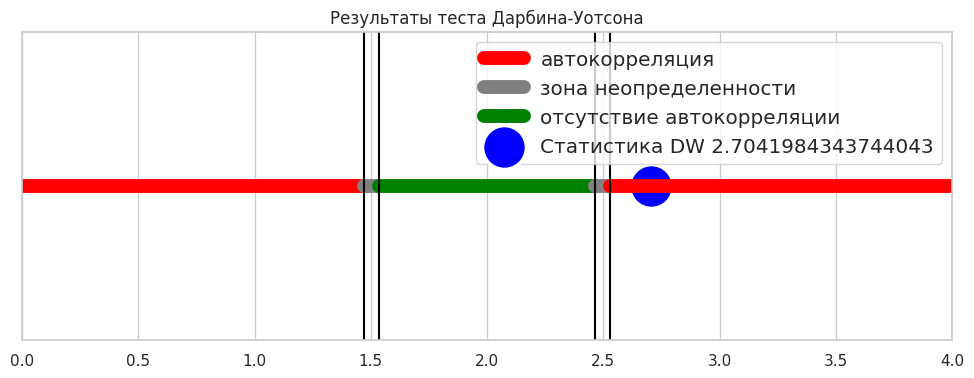

In [ ]:
#Считаем остатки
residuals = predictions_train - y_train

#Тест Дарбина Уотсона
dw = durbin_watson(residuals)
# Критические значения
dl=1.47
du = 1.537

# Проверка наличия автокорреляции
if (dw < du) or dw > 4-du:
  print('В модели присутствует автокорреляция остатков')
else:
  print('Автокорреляция остатков отсутствует')

# Построение графика
#Рисуем зоны
plt.figure(figsize = (12,4))
plt.plot([0, dl], [1, 1], color='red', lw=10, label='автокорреляция')
plt.plot([dl,du], [1,1], color = 'gray', lw =10, label = 'зона неопределенности')
plt.plot([du, 4- du], [1,1], color = 'green', lw =10, label = 'отсутствие автокорреляции')
plt.plot([4-du,4-dl], [1,1], color = 'gray', lw =10)
plt.plot([4-dl, 4], [1,1], color='red', lw=10)
#Ограничительные линии
plt.axvline(x = dl, c = 'black')
plt.axvline(x = 4-dl, c = 'black')
plt.axvline(x = du, c = 'black')
plt.axvline(x = 4-du, c = 'black')
sns.scatterplot(x = [dw], y = [1], color = 'blue', s = 1000, label = f'Статистика DW {dw}')
plt.legend( fontsize='large')
plt.title('Результаты теста Дарбина-Уотсона')
plt.xlim(0,4)
plt.gca().yaxis.set_visible(False)
plt.show()

P-value теста на нормальность: 0.10602165758609772
Нет оснований отклонить гипотезу о нормальности распределения остатков


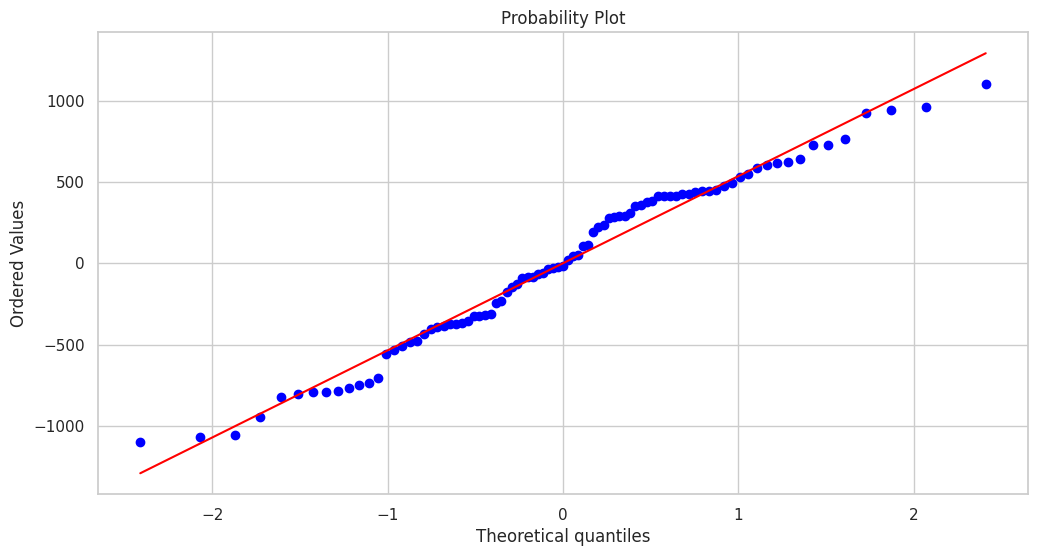

In [ ]:
# Тест на нормальность остатков
shapiro_test = shapiro(residuals[3:85])
print(f'P-value теста на нормальность: {shapiro_test.pvalue}')
if shapiro_test.pvalue < 0.05:
  print('Гипотеза о нормальности распределения остатков отклоняется')
else:
  print('Нет оснований отклонить гипотезу о нормальности распределения остатков')
st.probplot(residuals, dist = 'norm', plot = plt)
plt.show()

In [ ]:
#Оценка обучающей выборки
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 528.5870725879033
Средняя абсолютная ошибка  (MAPE): 0.12498364901541488
Коэффициент детерминации (R^2): 0.9980285723255151


In [ ]:
#Тестовая выборка
rmse = mean_squared_error(y_test, predictions_test, squared=False)
mape = mean_absolute_percentage_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя относительная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 4309.497231742483
Средняя относительная ошибка  (MAPE): 0.04674248771488704
Коэффициент детерминации (R^2): 0.8691878632623031


In [ ]:
#Построим график фактических и прогнозных значений
dat  = data[['quarter', 'salary']]
dat['predictions_train'] = np.nan
dat['predictions_test'] = np.nan
dat.loc[:87, 'predictions_train'] = predictions_train
dat.loc[87:,'predictions_test'] = predictions_test

<ipython-input-232-319ac3ac91c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['predictions_train'] = np.nan


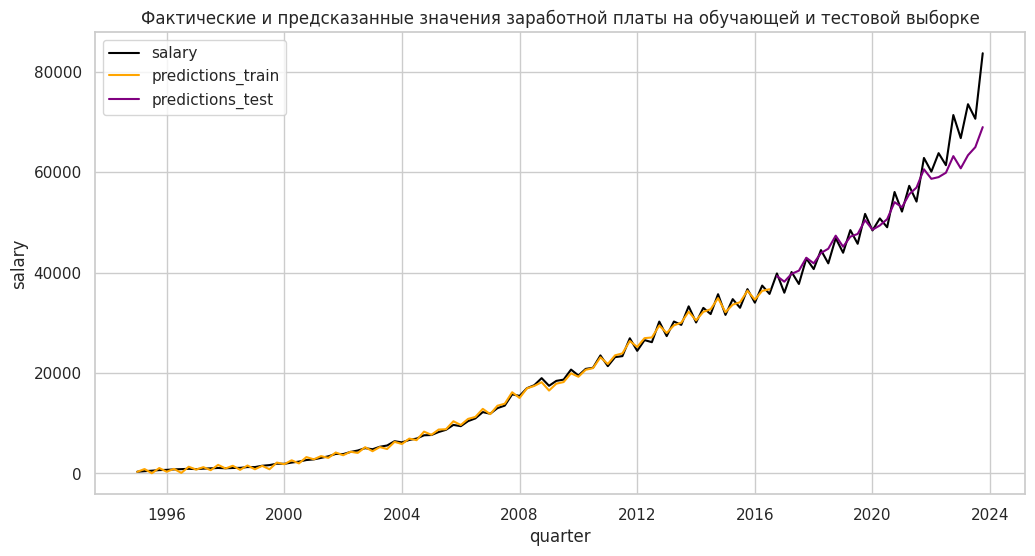

In [ ]:
for col in dat.columns[1:]:
  sns.lineplot(data = dat, x = 'quarter', y = col, label = col)
plt.legend()
plt.title('Фактические и предсказанные значения заработной платы на обучающей и тестовой выборке')
plt.show()

# SARIMAX

In [ ]:
X = sal2.drop('salary', axis=1)
y = sal2['salary']

# Разделение на тестовую и обучающие выборки
split_index = round(len(sal2) * 0.75)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Создание лагов для экзогенных переменных
max_lag = 2  # Максимальное количество лагов
columns = [ 'gdp^2', 'quarter*inf']
# Добавляем лаги для обучающей выборки
for lag in range(1, max_lag + 1):
    for col in columns:
        X_train[f'{col}_lag{lag}'] = X_train[col].shift(lag)

# Добавляем лаги для тестовой выборки
for lag in range(1, max_lag + 1):
    for col in columns:
        X_test[f'{col}_lag{lag}'] = X_test[col].shift(lag)

# Удаляем строки с пропусками, которые могли появиться из-за сдвига
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Удаляем лишние лаги
X_train = X_train.drop('quarter*inf_lag1', axis = 1)
X_test = X_test.drop('quarter*inf_lag1', axis = 1)
X_train = X_train.drop('gdp^2_lag1', axis = 1)
X_test = X_test.drop('gdp^2_lag1', axis = 1)

# Обрезаем y_train и y_test, чтобы они соответствовали обновленным X_train и X_test
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

# Построение модели SARIMAX
order = (3, 0, 4)
model = SARIMAX(y_train, exog=X_train, order=order)

# Обучение модели
model_fit = model.fit()

# Прогнозирование на обучающей выборке
predictions_train = model_fit.predict()

# Прогнозирование на тестовой выборке с использованием лагов экзогенных переменных
predictions_test = model_fit.forecast(steps=len(X_test), exog=X_test)
predictions_test.index += 4 # убираем сдвиг

# Оценка качества модели
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print(f"Training R^2: {r2_train}")
print(f"Test R^2: {r2_test}")

<ipython-input-247-1ddceeccd6bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[f'{col}_lag{lag}'] = X_train[col].shift(lag)
<ipython-input-247-1ddceeccd6bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[f'{col}_lag{lag}'] = X_train[col].shift(lag)
<ipython-input-247-1ddceeccd6bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Training R^2: 0.9989268984502162
Test R^2: 0.9535523425873674


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Автокорреляция остатков отсутствует


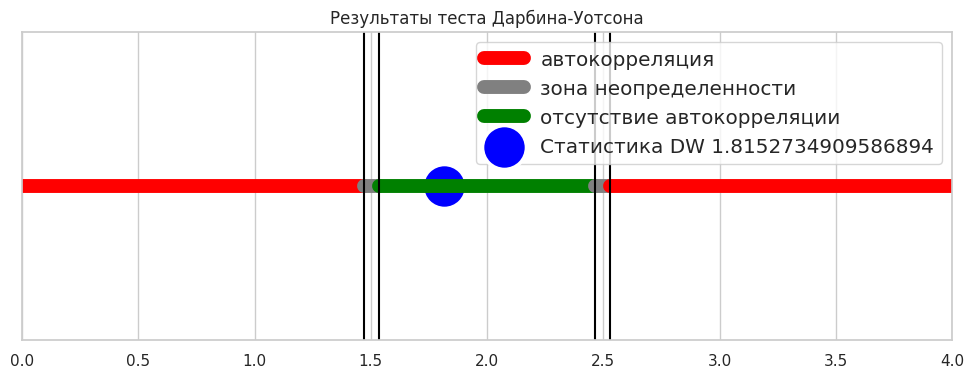

In [ ]:
#Считаем остатки
residuals = predictions_train - y_train

#Тест Дарбина Уотсона
dw = durbin_watson(residuals)
# Критические значения
dl=1.47
du = 1.537

# Проверка наличия автокорреляции
if (dw < du) or dw > 4-du:
  print('В модели присутствует автокорреляция остатков')
else:
  print('Автокорреляция остатков отсутствует')

# Построение графика
#Рисуем зоны
plt.figure(figsize = (12,4))
plt.plot([0, dl], [1, 1], color='red', lw=10, label='автокорреляция')
plt.plot([dl,du], [1,1], color = 'gray', lw =10, label = 'зона неопределенности')
plt.plot([du, 4- du], [1,1], color = 'green', lw =10, label = 'отсутствие автокорреляции')
plt.plot([4-du,4-dl], [1,1], color = 'gray', lw =10)
plt.plot([4-dl, 4], [1,1], color='red', lw=10)
#Ограничительные линии
plt.axvline(x = dl, c = 'black')
plt.axvline(x = 4-dl, c = 'black')
plt.axvline(x = du, c = 'black')
plt.axvline(x = 4-du, c = 'black')
sns.scatterplot(x = [dw], y = [1], color = 'blue', s = 1000, label = f'Статистика DW {dw}')
plt.legend( fontsize='large')
plt.title('Результаты теста Дарбина-Уотсона')
plt.xlim(0,4)
plt.gca().yaxis.set_visible(False)
plt.show()

P-value теста на нормальность: 3.4226344723720104e-05
Гипотеза о нормальности распределения остатков отклоняется


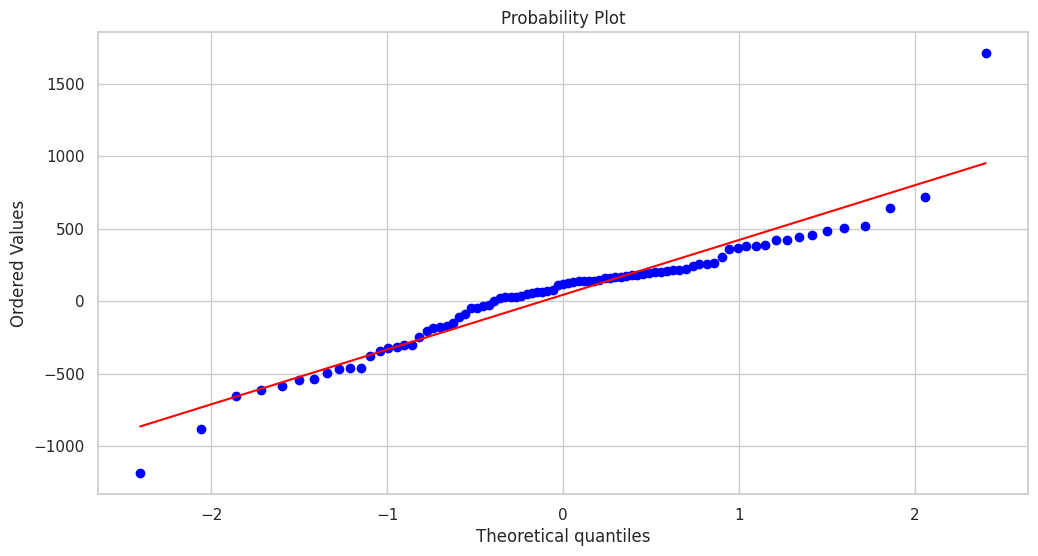

In [ ]:
residuals = predictions_train - y_train
# Тест на нормальность остатков
shapiro_test = shapiro(residuals[3:85])
print(f'P-value теста на нормальность: {shapiro_test.pvalue}')
if shapiro_test.pvalue < 0.05:
  print('Гипотеза о нормальности распределения остатков отклоняется')
else:
  print('Нет оснований отклонить гипотезу о нормальности распределения остатков')
st.probplot(residuals, dist = 'norm', plot = plt)
plt.show()

P-value теста на нормальность: 0.09509982168674469
Нет оснований отклонить гипотезу о нормальности распределения остатков


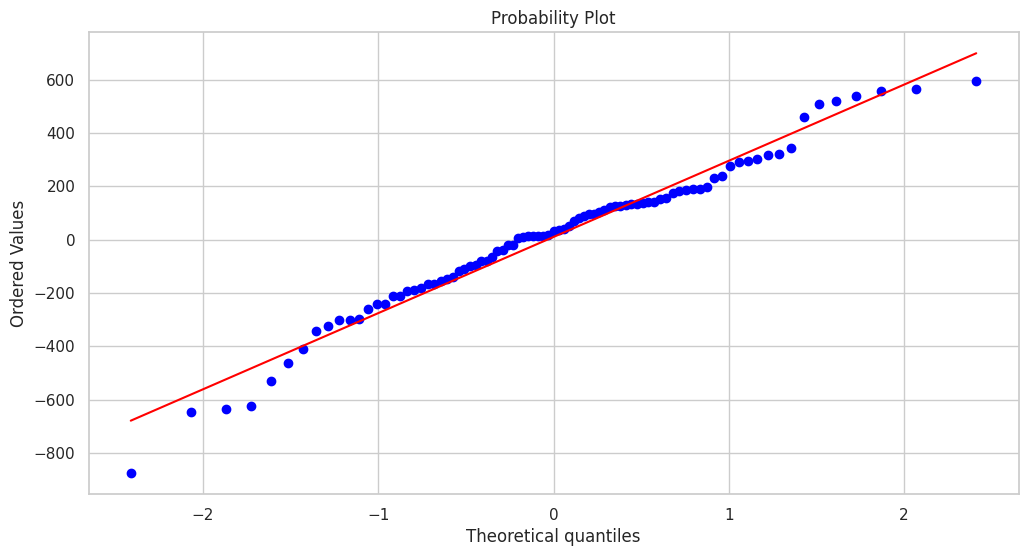

In [ ]:
residuals = predictions_train - y_train
# Тест на нормальность остатков
shapiro_test = shapiro(residuals)
print(f'P-value теста на нормальность: {shapiro_test.pvalue}')
if shapiro_test.pvalue < 0.05:
  print('Гипотеза о нормальности распределения остатков отклоняется')
else:
  print('Нет оснований отклонить гипотезу о нормальности распределения остатков')
st.probplot(residuals, dist = 'norm', plot = plt)
plt.show()

In [ ]:
#Построим график фактических и прогнозных значений
dat  = data[['quarter', 'salary']]
dat['predictions_train'] = np.nan
dat['predictions_test'] = np.nan
dat.loc[:86, 'predictions_train'] = predictions_train
dat.loc[89:,'predictions_test'] = predictions_test

<ipython-input-250-294eba196f60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['predictions_train'] = np.nan


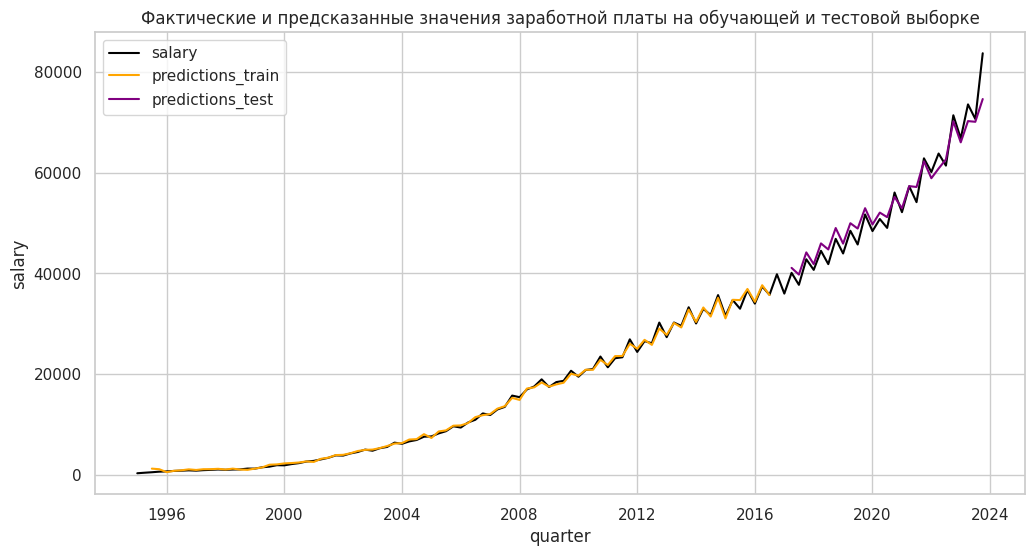

In [ ]:
for col in dat.columns[1:]:
  sns.lineplot(data = dat, x = 'quarter', y = col, label = col)
plt.legend()
plt.title('Фактические и предсказанные значения заработной платы на обучающей и тестовой выборке')
plt.show()